In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

# Configuration
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)
%matplotlib inline

# Diodo Schottky

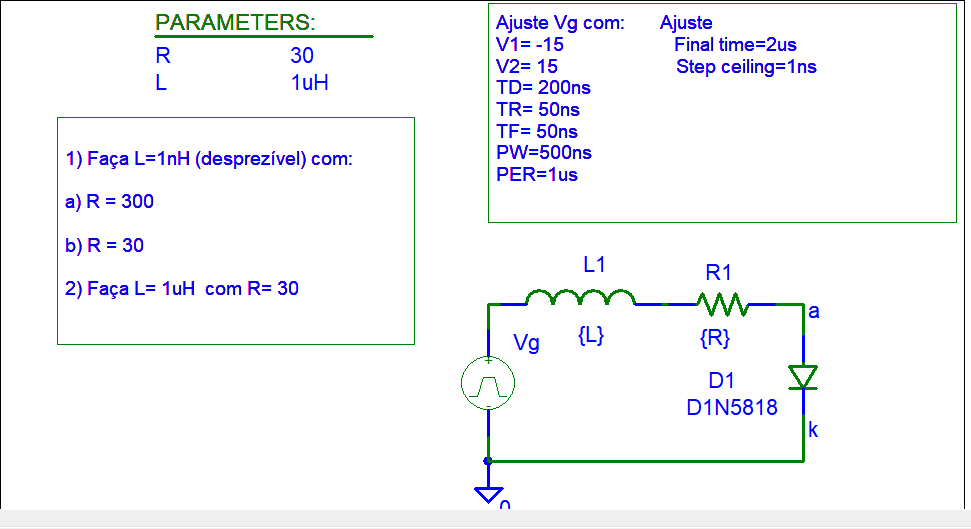

In [2]:
display(Image("cir1.png"))

Circuito em ngspice:

In [3]:
! cat netlist.cir

.param Lval = 1n
.param Rval = 300

vg vp 0 DC 0 PULSE(-15, 15, 200n, 50n, 50n, 500n, 1u)
l vp vl Lval
r vl vr Rval
d vr 0 D1N5818


## Simulação 1 (R = 300; L = 1n)

In [4]:
vka = np.genfromtxt('data/01-vka.csv')
vg = np.genfromtxt('data/01-vg.csv')
ika = np.genfromtxt('data/01-ika.csv')

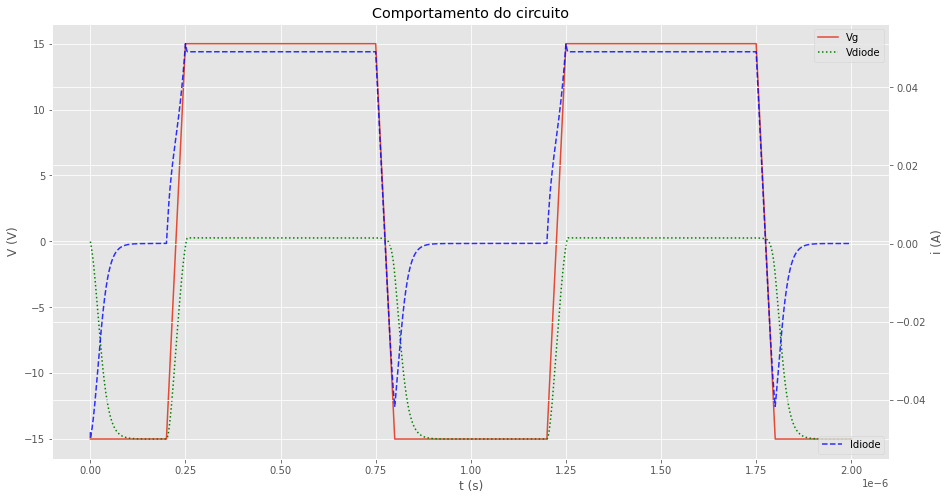

In [5]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vg[:,0], vg[:,1])
ax1.plot(vka[:,0], vka[:,1], ':g')
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['Vg', 'Vdiode'])

ax2 = ax1.twinx()
ax2.plot(ika[:,0], ika[:,1], '--b', alpha=0.8)
ax2.set_ylabel("i (A)")
ax2.legend(['Idiode'], loc='lower right')
plt.title("Comportamento do circuito")
plt.show()

Como sabido, e também podemos perceber no gráfico acima, o diodo Schottky possui um chaveamento muito rápido no sentido positivo (\~50ns) e uma queda de tensão imperceptível (\~250mV) quando está conduzindo. Como contrapartida, há um pico de corrente no momento em que o diodo passa de polarização direta para polarização reversa, levando algum tempo até que pare de conduzir reversamente (diodo desligue).

A carga de recuperação pode ser calculada através do cálculo da integral da curva da corrente no momento em que há corrente reversa:

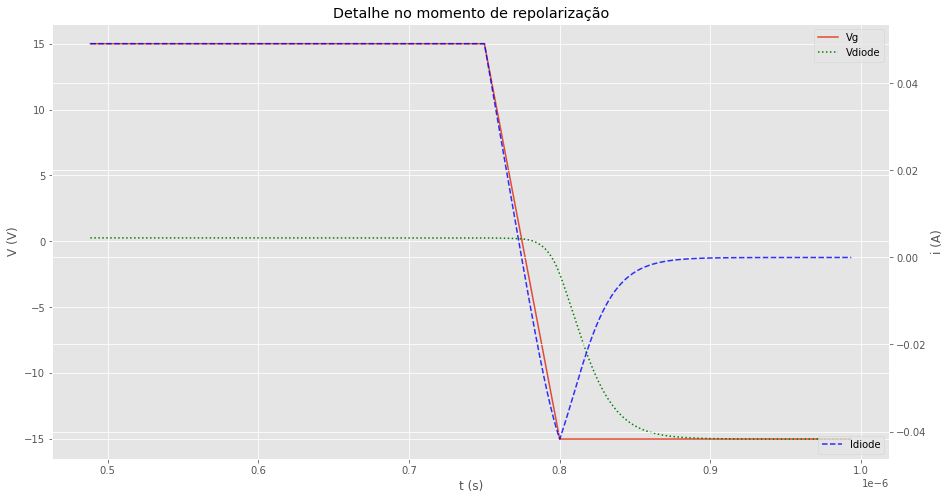

In [6]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vg[len(vg)//4:len(vg)//2,0], vg[len(vg)//4:len(vg)//2,1])
ax1.plot(vka[len(vg)//4:len(vg)//2,0], vka[len(vg)//4:len(vg)//2,1], ':g')
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['Vg', 'Vdiode'])

ax2 = ax1.twinx()
ax2.plot(ika[len(vg)//4:len(vg)//2,0], ika[len(vg)//4:len(vg)//2,1], '--b', alpha=0.8)
ax2.set_ylabel("i (A)")
ax2.legend(['Idiode'], loc='lower right')
plt.title("Detalhe no momento de repolarização")
plt.show()

Calculando-se a integral da corrente neste intervalo numericamente (como é possível observar nos anexos), chegamos no seguinte valor:

$$Q_{rr} = 1.51253E-09 \approx 1.51 ~\text{nC}$$

## Simulação 2 (R = 30; L = 1n)

In [7]:
vka = np.genfromtxt('data/01-vka2.csv')
vg = np.genfromtxt('data/01-vg2.csv')
ika = np.genfromtxt('data/01-ika2.csv')

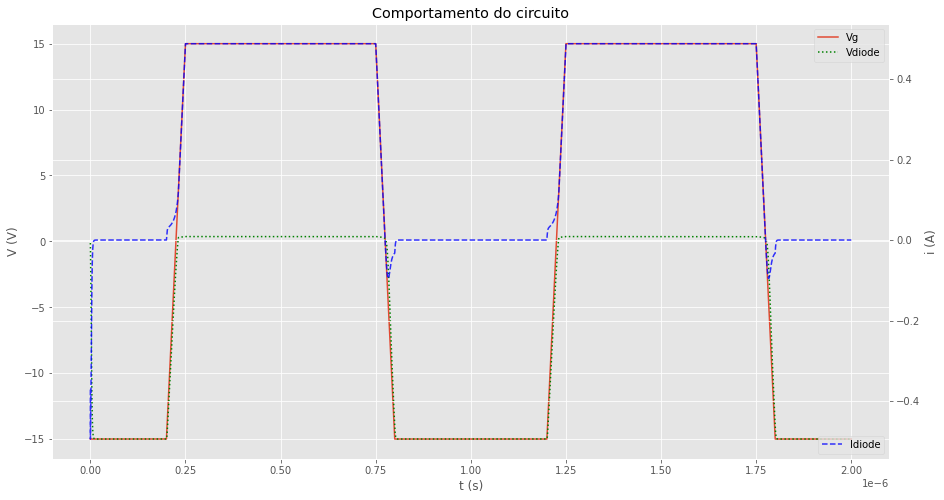

In [8]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vg[:,0], vg[:,1])
ax1.plot(vka[:,0], vka[:,1], ':g')
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['Vg', 'Vdiode'])

ax2 = ax1.twinx()
ax2.plot(ika[:,0], ika[:,1], '--b', alpha=0.8)
ax2.set_ylabel("i (A)")
ax2.legend(['Idiode'], loc='lower right')
plt.title("Comportamento do circuito")
plt.show()

Neste caso o R é menor e, portanto, quando a corrente muda de direção, há menos eletrons acumulados na carga (sobretensão negativa) em comparação ao exemplo anterior. Desta forma, o tempo para que o diodo repolarize, é menor, pois em menos tempo toda a sobretensão negativa é aliviada. Outra questão a se notar é que, com a redução de resistência na carga, a corrente que passa pelo diodo é bastante mais elevada (~500mA ao invés de ~50mA da simulação anterior).

E novamente o cálculo da carga de repolarização:

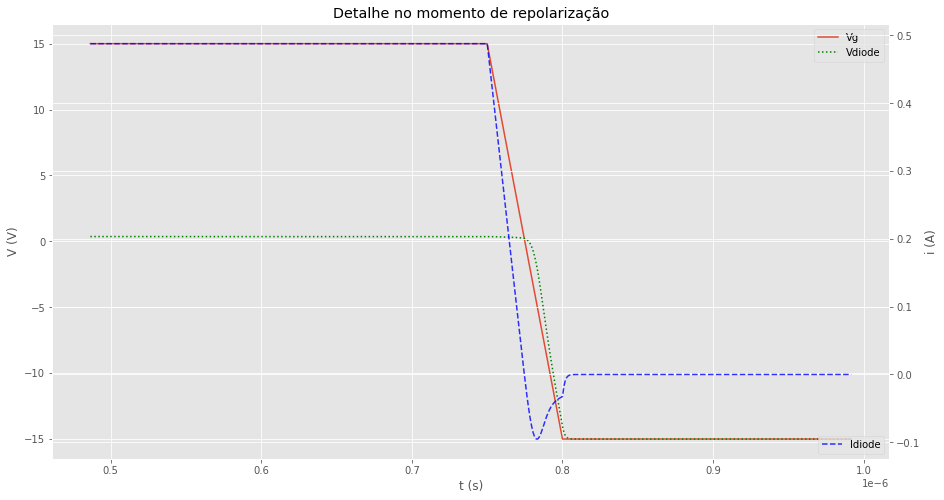

In [9]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vg[len(vg)//4:len(vg)//2,0], vg[len(vg)//4:len(vg)//2,1])
ax1.plot(vka[len(vg)//4:len(vg)//2,0], vka[len(vg)//4:len(vg)//2,1], ':g')
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['Vg', 'Vdiode'])

ax2 = ax1.twinx()
ax2.plot(ika[len(vg)//4:len(vg)//2,0], ika[len(vg)//4:len(vg)//2,1], '--b', alpha=0.8)
ax2.set_ylabel("i (A)")
ax2.legend(['Idiode'], loc='lower right')
plt.title("Detalhe no momento de repolarização")
plt.show()

Calculando-se a integral da corrente neste intervalo numericamente (como é possível observar nos anexos), chegamos no seguinte valor:

$$Q_{rr} = 1.41239E-09 \approx 1.41 ~\text{nC}$$

Como era de se esperar, nessa configuração há uma carga menor, o que é compatível com o pico de corrente também menor.

## Simulação 3 (R = 30; L = 1u)

In [10]:
vka = np.genfromtxt('data/01-vka3.csv')
vg = np.genfromtxt('data/01-vg3.csv')
ika = np.genfromtxt('data/01-ika3.csv')

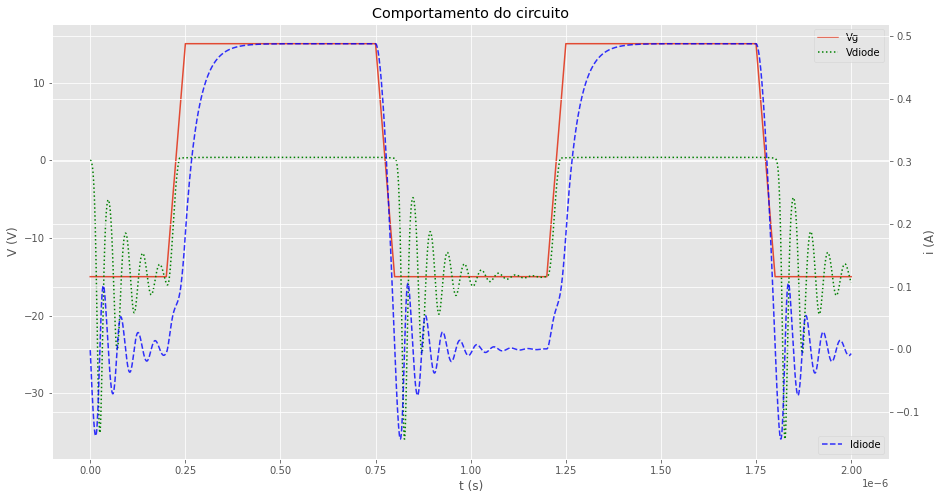

In [11]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vg[:,0], vg[:,1])
ax1.plot(vka[:,0], vka[:,1], ':g')
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['Vg', 'Vdiode'])

ax2 = ax1.twinx()
ax2.plot(ika[:,0], ika[:,1], '--b', alpha=0.8)
ax2.set_ylabel("i (A)")
ax2.legend(['Idiode'], loc='lower right')
plt.title("Comportamento do circuito")
plt.show()

Neste caso o comportamento é bastante diferente por conta do valor significativamente mais elevado da indutância. Podemos perceber um atraso da corrente em relação a tensão no momento de polarização direta e, mais perceptivelmente, uma grande variação oscilatória da tensão e da corrente no diodo na repolarização. Este último fenômeno se da, pois a corrente atrasada da tensão faz com que o diodo chaveie repetidas vezes, criando o comportamento percebido na figura acima.

A capacitância de junção pode ser calculada como a seguir:

$$f =\frac{1}{2\pi\cdot\sqrt{LC}}$$

Considerando $f = 22~\text{MHz}$ (figura abaixo), temos:

$$C = \frac{\left({2\pi f}\right)^{-2}}{L} = \frac{\left({2\pi 22\cdot10^{6}}\right)^{-2}}{10^{-6}} = 52.335~\text{pF}$$

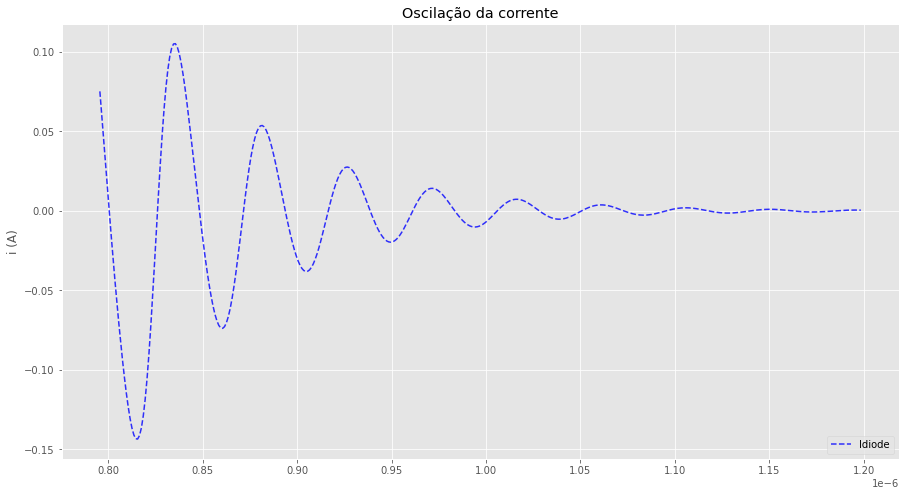

In [12]:
fig = plt.figure(figsize=(15,8))
ax2 = fig.add_subplot(111)
ax2.plot(ika[2*len(vg)//5:3*len(vg)//5,0], ika[2*len(vg)//5:3*len(vg)//5,1], '--b', alpha=0.8)
ax2.set_ylabel("i (A)")
ax2.legend(['Idiode'], loc='lower right')
plt.title("Oscilação da corrente")
plt.show()

# Transistores

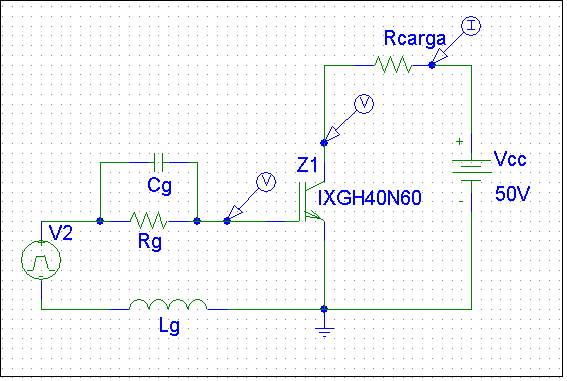

In [13]:
display(Image("cir2.png"))

Circuito em ngspice:

In [14]:
!cat netlist2.cir

.param LgVal = 0
.param RgVal = 100
.param CgVal = 0

v2 vp vn dc 0 PULSE(-10 10 0 10n 10n 10u 20u)
lg 0 vn {LgVal}
rg vp vz {RgVal}
cg vp vz {CgVal}
x1 vload vz 0 IRGBC40U
rload vload vcc 2
v1 vcc 0 dc 50


O subcircuito utilizado para a siluação (IRGBC40U, em anexo) foi retirado daqui (http://www.intusoft.com/articles/Igbt.pdf) e portanto pode apresentar variações em comparação com o modelo da biblioteca Pspice que foi sugerido.

O transistor IGBT têm funcionamento e aplicação análogos ao transistor MOS, com a diferença principal sendo sua composição e faixa de operação (tensões ainda mais elevadas). Como veremos a seguir, uma tensão no gate (Vz) possibilita a condução entre coletor e emissor (Vload).

## Simulação 1 (Rg = 100; Lg = 0; Cg = 0)

In [15]:
v2 = np.genfromtxt('data/02-v2.csv')
vz = np.genfromtxt('data/02-vz.csv')
vload = np.genfromtxt('data/02-vload.csv')
iload = np.genfromtxt('data/02-iload.csv')

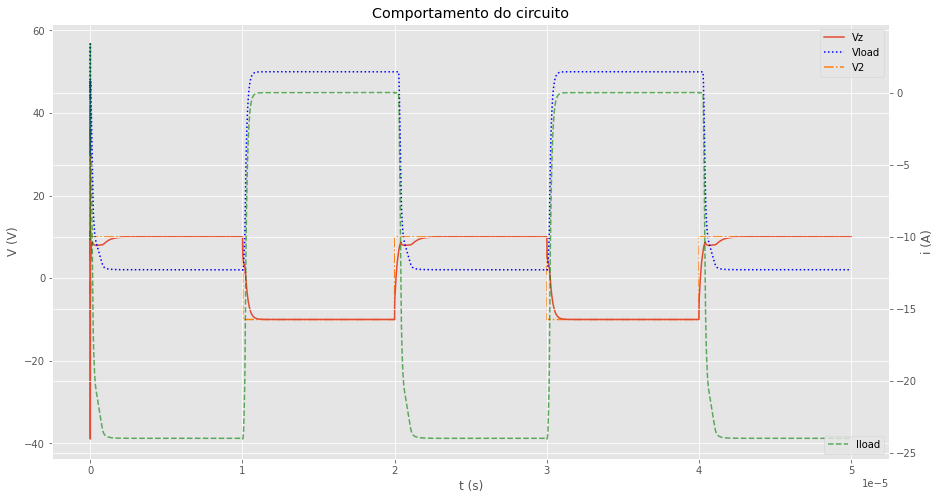

In [16]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vz[:,0], vz[:,1])
ax1.plot(vload[:,0], vload[:,1], ':b')
ax1.plot(v2[:,0], v2[:,1], '-.', color="tab:orange", zorder=-1)
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['Vz', 'Vload', 'V2'])

ax2 = ax1.twinx()
ax2.plot(iload[:,0], iload[:,1], '--g', alpha=0.6)
ax2.set_ylabel("i (A)")
ax2.legend(['Iload'], loc='lower right')
plt.title("Comportamento do circuito")

plt.show()

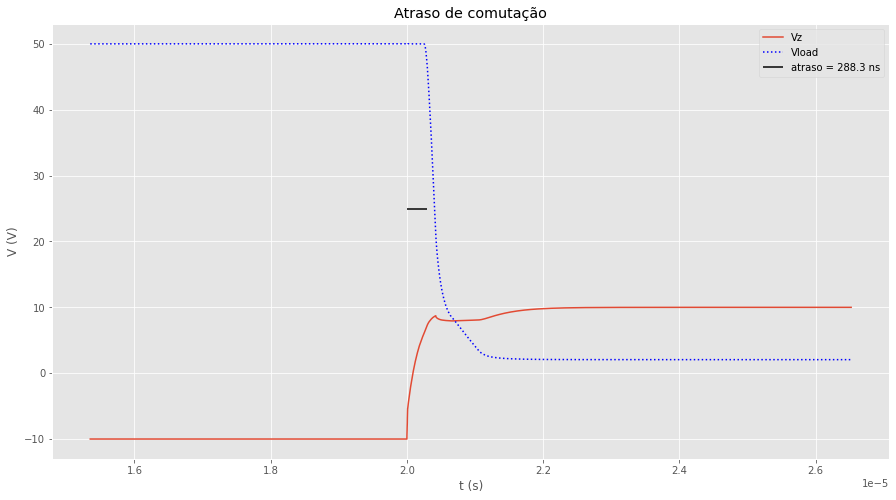

In [17]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vz[2*len(vz)//5:3*len(vz)//5,0], vz[2*len(vz)//5:3*len(vz)//5,1])
ax1.plot(vload[2*len(vz)//5:3*len(vz)//5,0], vload[2*len(vz)//5:3*len(vz)//5,1], ':b')
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.hlines(25, 0.00002, 0.0000202883)
ax1.legend(['Vz', 'Vload', 'atraso = 288.3 ns'])
plt.title("Atraso de comutação")

plt.show()

In [18]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vload[:,0], np.abs(vload[:,1])*np.abs(iload[:,1]))
ax1.set_ylabel("P (W)")
ax1.set_xlabel("t (s)")
plt.title("Potência instantânea (p(t) = v(t)i(t))")

plt.show()

## Simulação 2 (Rg = 10; Lg = 0; Cg = 0)

In [19]:
v2 = np.genfromtxt('data/02-v22.csv')
vz = np.genfromtxt('data/02-vz2.csv')
vload = np.genfromtxt('data/02-vload2.csv')
iload = np.genfromtxt('data/02-iload2.csv')

In [20]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vz[:,0], vz[:,1])
ax1.plot(vload[:,0], vload[:,1], ':b')
ax1.plot(v2[:,0], v2[:,1], '-.', color="tab:orange", zorder=-1)
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['Vz', 'Vload', 'V2'])

ax2 = ax1.twinx()
ax2.plot(iload[:,0], iload[:,1], '--g', alpha=0.6)
ax2.set_ylabel("i (A)")
ax2.legend(['Iload'], loc='lower right')
plt.title("Comportamento do circuito")

plt.show()

In [21]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vz[2*len(vz)//5:3*len(vz)//5,0], vz[2*len(vz)//5:3*len(vz)//5,1])
ax1.plot(vload[2*len(vz)//5:3*len(vz)//5,0], vload[2*len(vz)//5:3*len(vz)//5,1], ':b')
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.hlines(25, 0.00002, 0.0000200982)
ax1.legend(['Vz', 'Vload', 'atraso = 98.2 ns'])
plt.title("Atraso de comutação")

plt.show()

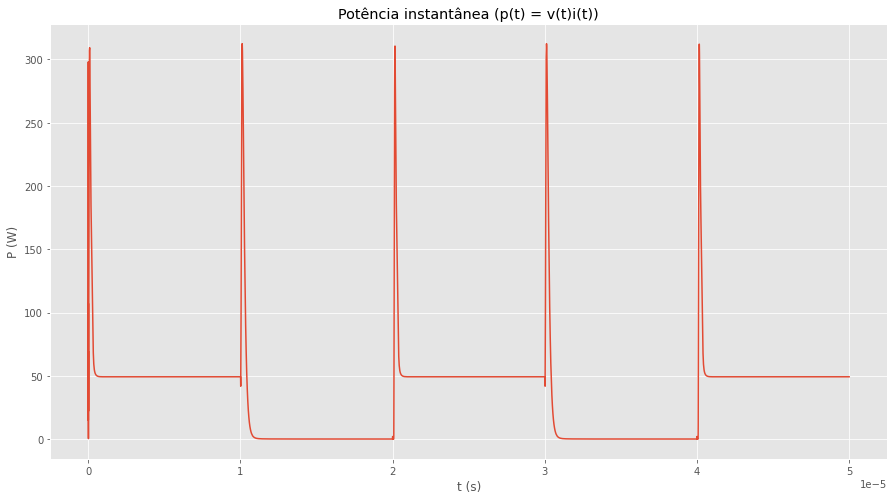

In [22]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vload[:,0], np.abs(vload[:,1])*np.abs(iload[:,1]))
ax1.set_ylabel("P (W)")
ax1.set_xlabel("t (s)")
plt.title("Potência instantânea (p(t) = v(t)i(t))")

plt.show()

## Simulação 3 (Rg = 100; Lg = 0; Cg = 20n)

In [23]:
v2 = np.genfromtxt('data/02-v23.csv')
vz = np.genfromtxt('data/02-vz3.csv')
vload = np.genfromtxt('data/02-vload3.csv')
iload = np.genfromtxt('data/02-iload3.csv')

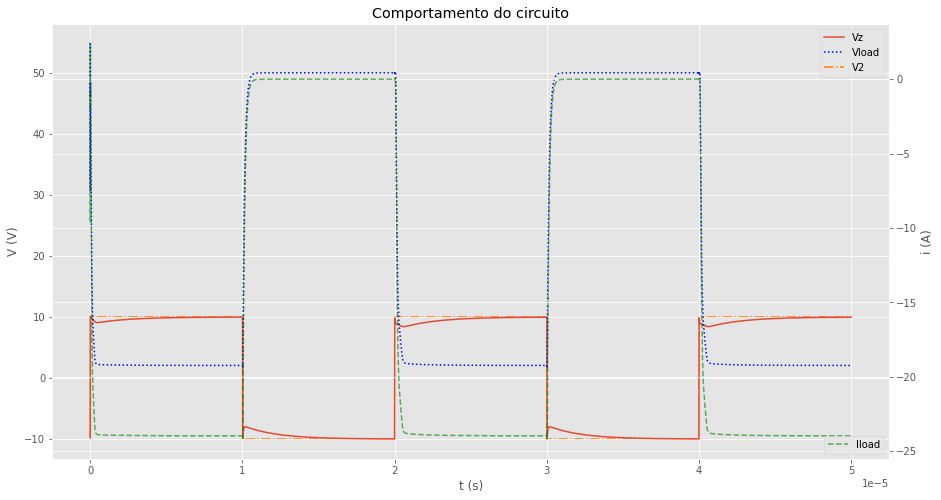

In [24]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vz[:,0], vz[:,1])
ax1.plot(vload[:,0], vload[:,1], ':b')
ax1.plot(v2[:,0], v2[:,1], '-.', color="tab:orange", zorder=-1)
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['Vz', 'Vload', 'V2'])

ax2 = ax1.twinx()
ax2.plot(iload[:,0], iload[:,1], '--g', alpha=0.6)
ax2.set_ylabel("i (A)")
ax2.legend(['Iload'], loc='lower right')
plt.title("Comportamento do circuito")

plt.show()

In [25]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vz[3*len(vz)//7:4*len(vz)//7,0], vz[3*len(vz)//7:4*len(vz)//7,1])
ax1.plot(vload[3*len(vz)//7:4*len(vz)//7,0], vload[3*len(vz)//7:4*len(vz)//7,1], ':b')
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.hlines(25, 0.00002, 0.00002007)
ax1.legend(['Vz', 'Vload', 'atraso = 70 ns'])
plt.title("Atraso de comutação")

plt.show()

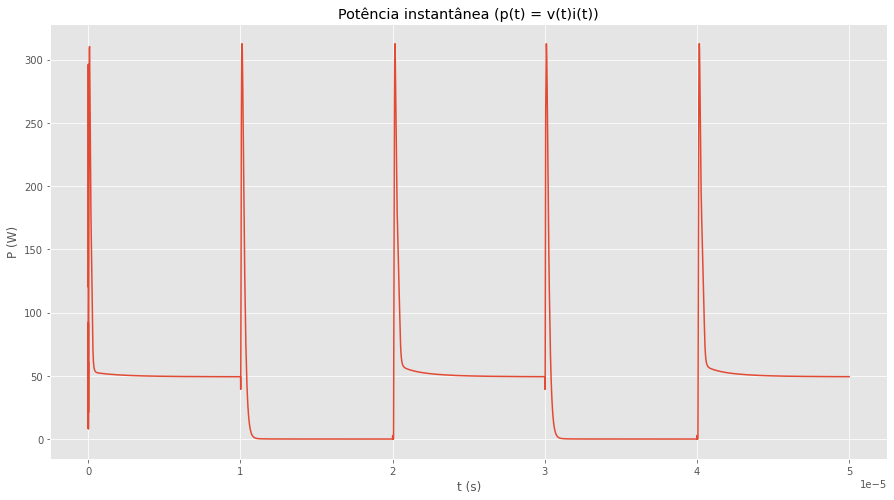

In [26]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vload[:,0], np.abs(vload[:,1])*np.abs(iload[:,1]))
ax1.set_ylabel("P (W)")
ax1.set_xlabel("t (s)")
plt.title("Potência instantânea (p(t) = v(t)i(t))")

plt.show()

Se compararmos os circuitos 1 e 2 (com diferentes valores de resistência), podemos perceber que o resistor no ramo que liga ao gate do IGBT influencia na corrente que passa pelo gate e, consequentemente, no chaveamento do transistor. No primeiro caso (R=100), temos um tempo de atraso de 288ns, muito superior quando comparado ao segundo (R=10) com apenas 98ns de atraso. Isto se deve à capacitâncias no gate do transistor. Com uma resistência menor, portanto corrente maior, há um carregamento mais rápido das capacitâncias do gate e, assim, maior velocidade de chaveamento.

No circuito 3, ao se adicionar um capacitor Cg em paralelo com a resistência Rg, vemos uma diminuição ainda maior do tempo de atraso (70ns) que é explicado pelo fato de que a adição de Cg cria uma rota alternativa à corrente, fazendo com que a corrente flua mais rapidamente, carregando as capacitâncias de gate com maior velocidade e, portanto, permitindo uma maior velocidade de chaveamento.

Em termos de potência instantânea, todos os gráficos mostram picos de potência causados por momentos em que há simultaneamente tensão na carga e corrente no transistor. Pela comparação entre 1 e 2 podemos concluir que uma diminuição da resistência (e no tempo de atraso) diminui o tempo desses picos de potência. Já no caso 3, embora haja uma diminuição do tempo de atraso, há um aumento da defasagem tensão-corrente causado pelo capacitor Cg, assim, os picos de potência duram mais tempo do que a situação 2, embora durem menos tempo do que a situação 1 sem redução de resistência e sem adição de capacitâncias.

## Simulação 4 (Rg = 100; Lg = 1n; Cg = 20n)

Infelizmente, com o modelo utilizado, foi impossível observar qualquer diferença entre a simulação 3 e 4. Assim, o processo escolhido foi aumentar progressivamente o valor da indutância para observar se haveria alguma alteração. Com a indutância valendo 1uH é possível perceber um indício de oscilação na tensão no gate (Vz), mas com 10uH essa oscilação é muito perceptível. Seguem as análises para o valor de Lg=10uH.

In [27]:
v2 = np.genfromtxt('data/02-v24.csv')
vz = np.genfromtxt('data/02-vz4.csv')
vload = np.genfromtxt('data/02-vload4.csv')
iload = np.genfromtxt('data/02-iload4.csv')

In [28]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(vz[:,0], vz[:,1])
ax1.plot(vload[:,0], vload[:,1], ':b')
ax1.plot(v2[:,0], v2[:,1], '-.', color="tab:orange", zorder=-1)
ax1.set_ylabel("V (V)")
ax1.set_xlabel("t (s)")
ax1.legend(['Vz', 'Vload', 'V2'])

ax2 = ax1.twinx()
ax2.plot(iload[:,0], iload[:,1], '--g', alpha=0.6)
ax2.set_ylabel("i (A)")
ax2.legend(['Iload'], loc='lower right')
plt.title("Comportamento do circuito")

plt.show()

Aqui (de forma bastante exagerada), podemos perceber o efeito oscilatório que introdução de uma indutância causou. Isto se deve à conjunção da indutância com a capacitância de gate, que produz um comportamento oscilatório similar a um circuito RLC subamortecido.

Assim podemos notar que, ao adicionar uma capacitância de entrada, o tempo de atraso é drasticamente diminuído, porém deve-se tomar cuidado com indutâncias do circuito que podem causar um comportamento oscilatório em Vz, causando anomalias no circuito (o transistor pode ligar e desligar até que a oscilação diminua.

# Anexos {-}

Arquivos utilizados e gerados para e na simulação:

In [29]:
%%bash
echo "Modelo de Diodo Schottky:"
echo ""
echo "schottky.cir:"
echo "======="
echo ""
cat ../models/schottky.cir

Modelo de Diodo Schottky:

schottky.cir:

.model D1N5818 D(Is=2.835u Rs=47.12m Ikf=.3227 N=1 Xti=0 Eg=1.11 Cjo=359.3p + M=.6513 Vj=.75 Fc=.5 Isr=26.46u Nr=2)


In [30]:
%%bash
echo "Modelo de Transistor IGBT:"
echo ""
echo "nigbt.cir:"
echo "======="
echo ""
cat ../models/nigbt.cir

Modelo de Transistor IGBT:

nigbt.cir:

* From: http://www.intusoft.com/articles/Igbt.pdf

.SUBCKT IRGBC40U 71 72 74
*     TERMINALS:  C  G  E
*  600 Volt  40 Amp  6.04NS  N-Channel IGBT  06-13-1992
Q1  83 81 85     QOUT
M1  81 82 83 83  MFIN L=1U W=1U
DSD 83 81  DO
DBE 85 81  DE
RC  85 71  21.1M
RE  83 73  2.11M
RG  72 82  25.6
CGE 82 83  1.42N
CGC 82 71  1P
EGD 91  0 82 81  1
VFB 93  0  0
FFB 82 81  VFB  1
CGD 92 93  1.41N
R1  92  0  1
D1  91 92  DLIM
DHV 94 93  DR
R2  91 94  1
D2  94  0  DLIM
DLV 94 95  DR 13
RLV 95  0  1
ESD 96 93  POLY(1) 83 81  19  1
MLV 95 96 93 93  SW
LE  73 74  7.5N
.MODEL SW NMOS (LEVEL=3 VTO=0 KP=5)
.MODEL QOUT PNP (IS=377F NF=1.2 BF=5.1 CJE=3.48N
+ TF=24.3N XTB=1.3)
.MODEL MFIN NMOS (LEVEL=3 VMAX=400K THETA=36.1M ETA=2M
+ VTO=5.2 KP=2.12)
.MODEL DR D (IS=37.7F CJO=100P VJ=1 M=.82)
.MODEL DO D (IS=37.7F BV=600 CJO=2.07N VJ=1 M=.7)
.MODEL DE D (IS=37.7F BV=14.3 N=2)
.MODEL DLIM D (IS=100N)
.ENDS



In [31]:
%%bash
echo "ex1.cir"
echo "======="
echo ""
cat ex1.cir

ex1.cir

Shottky diode (1N5818)

* OPTIONS
.option TEMP=27C
.option METHOD=GEAR

.measure tran qrr INTEG i(vg) from=0.771u to=0.989u

* CONTROL
.control
tran 50n 2u 0 1n uic

option numdgt=4
wrdata data/01-vka.csv vr(vr)
wrdata data/01-vg.csv vr(vp)
wrdata data/01-ika.csv -i(vg)

.endc

* END
.end


In [32]:
%%bash
echo "01.out"
echo "======="
echo ""
cat data/01.out

01.out

warning, can't find model lval
warning, can't find model rval

Circuit: shottky diode (1n5818)

  .model d1n5818 d(is=2.835u rs=47.12m ikf=.3227 n=1 xti=0 eg=1.11 cjo=359 ...
unrecognized parameter (+) - ignored
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using transient initial conditions

No. of Data Rows : 2047

  Measurements for Transient Analysis

qrr                 =   1.51253e-09 from=  7.71000e-07 to=  9.89000e-07

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


  Measurements for Transient Analysis

qrr                 =   1.51253e-09 from=  7.71000e-07 to=  9.89000e-07


Total analysis time (seconds) = 0.026

Total elapsed time (seconds) = 0.038 

Total DRAM available = 3818.465 MB.
DRAM currently available =  208.371 MB.
Maximum ngspice program size =   22.566 MB.
Current ngspice program size =   11.250 MB.

Shared ngspice pages =    9.617 MB.
Text (code) pages =    5.086 MB.
Stack = 0 bytes.
Library pages =    2.039 MB.



In [33]:
%%bash
echo "ex2.cir"
echo "======="
echo ""
cat ex2.cir

ex2.cir

Shottky diode (1N5818)

* OPTIONS
.option TEMP=27C
.option METHOD=GEAR

.measure tran qrr INTEG i(vg) from=0.771u to=0.989u

* CONTROL
.control

alterparam Rval = 30

reset

tran 50n 2u 0 1n uic

option numdgt=4
wrdata data/01-vka2.csv vr(vr)
wrdata data/01-vg2.csv vr(vp)
wrdata data/01-ika2.csv -i(vg)

.endc

* END
.end


In [34]:
%%bash
echo "02.out"
echo "======="
echo ""
cat data/02.out

02.out

warning, can't find model lval
warning, can't find model rval

Circuit: shottky diode (1n5818)

  .model d1n5818 d(is=2.835u rs=47.12m ikf=.3227 n=1 xti=0 eg=1.11 cjo=359 ...
unrecognized parameter (+) - ignored
Reset re-loads circuit shottky diode (1n5818)

Circuit: shottky diode (1n5818)

  .model d1n5818 d(is=2.835u rs=47.12m ikf=.3227 n=1 xti=0 eg=1.11 cjo=359 ...
unrecognized parameter (+) - ignored
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using transient initial conditions

No. of Data Rows : 2071

  Measurements for Transient Analysis

qrr                 =   1.41239e-09 from=  7.71000e-07 to=  9.89000e-07

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


  Measurements for Transient Analysis

qrr                 =   1.41239e-09 from=  7.71000e-07 to=  9.89000e-07


Total analysis time (seconds) = 0.014

Total elapsed time (seconds) = 0.022 

Total DRAM available = 3818.465 MB.
DRAM currently available =  207.355 MB.
Maximum ngspice program size 

In [35]:
%%bash
echo "ex3.cir"
echo "======="
echo ""
cat ex3.cir

ex3.cir

Shottky diode (1N5818)

* OPTIONS
.option TEMP=27C
.option METHOD=GEAR

* CONTROL
.control

alterparam Rval = 30
alterparam Lval = 1u

reset

tran 50n 2u 0 1n uic

option numdgt=4
wrdata data/01-vka3.csv vr(vr)
wrdata data/01-vg3.csv vr(vp)
wrdata data/01-ika3.csv -i(vg)

.endc

* END
.end


In [36]:
%%bash
echo "03.out"
echo "======="
echo ""
cat data/03.out

03.out

warning, can't find model lval
warning, can't find model rval

Circuit: shottky diode (1n5818)

  .model d1n5818 d(is=2.835u rs=47.12m ikf=.3227 n=1 xti=0 eg=1.11 cjo=359 ...
unrecognized parameter (+) - ignored
Reset re-loads circuit shottky diode (1n5818)

Circuit: shottky diode (1n5818)

  .model d1n5818 d(is=2.835u rs=47.12m ikf=.3227 n=1 xti=0 eg=1.11 cjo=359 ...
unrecognized parameter (+) - ignored
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using transient initial conditions
Note: No ".plot", ".print", or ".fourier" lines; no simulations run

No. of Data Rows : 2035


In [37]:
%%bash
echo "ex4.cir"
echo "======="
echo ""
cat ex4.cir

ex4.cir

IGBT

* OPTIONS
.option TEMP=27C
.option METHOD=GEAR

* CONTROL
.control
tran 0.1u 50u 0 uic

option numdgt=4
wrdata data/02-v2.csv vr(vp)-vr(vn)
wrdata data/02-vz.csv vr(vz)
wrdata data/02-vload.csv vr(vload)
wrdata data/02-iload.csv i(v1)

.endc

* END
.end


In [38]:
%%bash
echo "04.out"
echo "======="
echo ""
cat data/04.out

04.out


Circuit: igbt

Reducing trtol to 1 for xspice 'A' devices
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using transient initial conditions
Note: No ".plot", ".print", or ".fourier" lines; no simulations run

No. of Data Rows : 1265


In [39]:
%%bash
echo "ex5.cir"
echo "======="
echo ""
cat ex5.cir

ex5.cir

IGBT

* OPTIONS
.option TEMP=27C
.option METHOD=GEAR

* CONTROL
.control
alterparam RgVal = 10
reset

tran 0.1u 50u 0 uic

option numdgt=4
wrdata data/02-v22.csv vr(vp)-vr(vn)
wrdata data/02-vz2.csv vr(vz)
wrdata data/02-vload2.csv vr(vload)
wrdata data/02-iload2.csv i(v1)

.endc

* END
.end


In [40]:
%%bash
echo "05.out"
echo "======="
echo ""
cat data/05.out

05.out


Circuit: igbt

Reset re-loads circuit igbt

Circuit: igbt

Reducing trtol to 1 for xspice 'A' devices
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using transient initial conditions
Note: No ".plot", ".print", or ".fourier" lines; no simulations run

No. of Data Rows : 1254


In [41]:
%%bash
echo "ex6.cir"
echo "======="
echo ""
cat ex6.cir

ex6.cir

IGBT

* OPTIONS
.option TEMP=27C
.option METHOD=GEAR

* CONTROL
.control
alterparam CgVal = 20n
reset

tran 0.1u 50u 0 uic

option numdgt=4
wrdata data/02-v23.csv vr(vp)-vr(vn)
wrdata data/02-vz3.csv vr(vz)
wrdata data/02-vload3.csv vr(vload)
wrdata data/02-iload3.csv i(v1)

.endc

* END
.end


In [42]:
%%bash
echo "06.out"
echo "======="
echo ""
cat data/06.out

06.out


Circuit: igbt

Reset re-loads circuit igbt

Circuit: igbt

Reducing trtol to 1 for xspice 'A' devices
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using transient initial conditions
Note: No ".plot", ".print", or ".fourier" lines; no simulations run

No. of Data Rows : 1258


In [43]:
%%bash
echo "ex7.cir"
echo "======="
echo ""
cat ex7.cir

ex7.cir

IGBT

* OPTIONS
.option TEMP=27C
.option METHOD=GEAR

* CONTROL
.control
alterparam CgVal = 20n
alterparam LgVal = 0.01m
reset

tran 0.01u 50u 0 uic

option numdgt=4
wrdata data/02-v24.csv vr(vp)-vr(vn)
wrdata data/02-vz4.csv vr(vz)
wrdata data/02-vload4.csv vr(vload)
wrdata data/02-iload4.csv i(v1)

.endc

* END
.end


In [44]:
%%bash
echo "07.out"
echo "======="
echo ""
cat data/07.out

07.out


Circuit: igbt

Reset re-loads circuit igbt

Circuit: igbt

Reducing trtol to 1 for xspice 'A' devices
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using transient initial conditions
Note: No ".plot", ".print", or ".fourier" lines; no simulations run

No. of Data Rows : 5665
